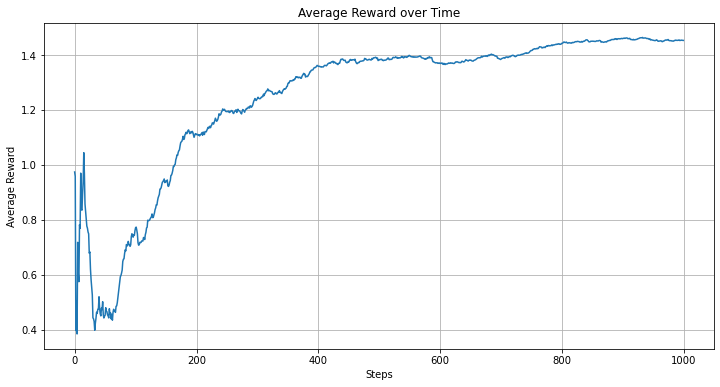

True action values: [ 0.62687649  0.38115318  0.74265174  1.67749176 -0.74172977  1.45557034
  0.71106489 -0.72322523  0.06006256 -1.45355351]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

class NArmedBandit:
    def __init__(self, n_arms, epsilon):
        self.n_arms = n_arms
        self.epsilon = epsilon
        self.q_values = np.zeros(n_arms)  # Estimated values of each arm
        self.action_count = np.zeros(n_arms)  # Count of actions taken on each arm
        self.true_action_values = np.random.randn(n_arms)  # True values of each arm

    def select_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.n_arms)  # Explore: choose a random arm
        else:
            return np.argmax(self.q_values)  # Exploit: choose the best-known arm

    def update_estimates(self, action, reward):
        self.action_count[action] += 1
        # Incremental formula for updating the estimated value of the action
        self.q_values[action] += (reward - self.q_values[action]) / self.action_count[action]

    def get_reward(self, action):
        # Simulate reward from the chosen arm based on its true value plus some noise
        return np.random.randn() + self.true_action_values[action]

def run_experiment(n_arms=10, epsilon=0.1, n_steps=1000):
    bandit = NArmedBandit(n_arms, epsilon)
    rewards = np.zeros(n_steps)

    for step in range(n_steps):
        action = bandit.select_action()
        reward = bandit.get_reward(action)
        bandit.update_estimates(action, reward)
        rewards[step] = reward

    cumulative_rewards = np.cumsum(rewards)
    average_rewards = cumulative_rewards / (np.arange(n_steps) + 1)

    return average_rewards, bandit.true_action_values

# Parameters
n_arms = 10
epsilon = 0.1
n_steps = 1000

# Run the experiment
average_rewards, true_action_values = run_experiment(n_arms, epsilon, n_steps)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(average_rewards)
plt.title('Average Reward over Time')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.grid()
plt.show()

print("True action values:", true_action_values)
